# Textklassifikation

## Datensatz laden

In [100]:
from sklearn import datasets

In [101]:
data = datasets.fetch_20newsgroups(shuffle=True)

In [102]:
len(data.data)

11314

In [103]:
data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [104]:
print(data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






In [105]:
data.target[0]

7

In [106]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, test_size=0.5)

## Bag of Words

**Aufgabe 1:** Verwende zunächst die ersten 10 Dokumente aus dem Trainings-Datensatz, um Schritt für Schritt eine Funktion `tokenize_documents` aufzubauen.

1) Entferne alle Zeilenumbrüche (`"\n"`) und konvertiere jedes Dokument in Kleinbuchstaben.
2) Ersetze alle Satzzeichen usw. durch Leerzeichen.
3) Splitte jedes Dokument in einzelne Wörter. (Achte darauf, dass die Liste der Wörter keine leeren Einträge `""` enthält.)

In [109]:
docs = x_train[:10]

In [110]:
def tokenize_documents(docs):
    tokenized = []
    for doc in docs:
        # START Dein Code
        
        doc = doc.replace("\n", " ")
        doc = doc.lower()
        for char in ".;!?,()[]\"'":
            doc = doc.replace(char, " ")
            
        doc = doc.split(" ")
        
        doc = [token for token in doc if token]
        
        # ENDE
        tokenized.append(doc)
    
    return tokenized

tokenize_documents(docs)

[['from:',
  'khan0095@nova',
  'gmi',
  'edu',
  'mohammad',
  'razi',
  'khan',
  'subject:',
  're:',
  'fundamentalism',
  '-',
  'again',
  'organization:',
  'gmi',
  'engineering&management',
  'institute',
  'flint',
  'mi',
  'lines:',
  '10',
  'ok',
  'someone',
  'is',
  'fundamentalist',
  'someone',
  'else',
  'is',
  'not',
  'what',
  'defines',
  'a',
  'fundamentalist',
  'not',
  'who',
  'that',
  'is',
  'an',
  'essential',
  'question',
  'which',
  'nobody',
  'has',
  'agreed',
  'upon',
  'an',
  'answer',
  'at',
  'least',
  'to',
  'what',
  'literature',
  '/',
  'discussion',
  '/',
  'news',
  'i',
  've',
  'seen',
  '--',
  'mohammad',
  'r',
  'khan',
  '/',
  'khan0095@nova',
  'gmi',
  'edu',
  'after',
  'july',
  '93',
  'please',
  'send',
  'mail',
  'to',
  'mkhan@nyx',
  'cs',
  'du',
  'edu'],
 ['from:',
  'richw@mks',
  'com',
  'rich',
  'wales',
  'subject:',
  'sick',
  'and',
  'tired',
  'was',
  're:',
  'bill',
  'conklin',
  'et',
 

**Aufgabe 2:**

Welche Wörter kommen im Datensatz vor? Wie oft kommen diese vor?

Erstelle dazu ein Dictionary `vocab` dessen Schlüssel die Wörter und dessen Wert jeweils die Anzahl des Vorkommens des Worts ist.

In [111]:
tokenized_docs = tokenize_documents(x_train[:10])

In [112]:
def create_vocabulary(tokenized_docs):
    vocab = {}
    
    for doc in tokenized_docs:
        # START Dein Code

        for word in doc:
            
            if word in vocab:
                vocab[word] = vocab[word] + 1
            else:
                vocab[word] = 1
    
        # ENDE
    
    return vocab

create_vocabulary(tokenized_docs)

{'from:': 10,
 'khan0095@nova': 2,
 'gmi': 3,
 'edu': 16,
 'mohammad': 2,
 'razi': 1,
 'khan': 2,
 'subject:': 10,
 're:': 6,
 'fundamentalism': 1,
 '-': 3,
 'again': 1,
 'organization:': 8,
 'engineering&management': 1,
 'institute': 1,
 'flint': 1,
 'mi': 1,
 'lines:': 10,
 '10': 1,
 'ok': 2,
 'someone': 3,
 'is': 37,
 'fundamentalist': 2,
 'else': 4,
 'not': 17,
 'what': 15,
 'defines': 1,
 'a': 67,
 'who': 9,
 'that': 49,
 'an': 10,
 'essential': 1,
 'question': 1,
 'which': 6,
 'nobody': 1,
 'has': 9,
 'agreed': 1,
 'upon': 3,
 'answer': 1,
 'at': 12,
 'least': 3,
 'to': 87,
 'literature': 1,
 '/': 3,
 'discussion': 1,
 'news': 2,
 'i': 56,
 've': 5,
 'seen': 2,
 '--': 9,
 'r': 2,
 'after': 4,
 'july': 1,
 '93': 1,
 'please': 3,
 'send': 4,
 'mail': 1,
 'mkhan@nyx': 1,
 'cs': 1,
 'du': 1,
 'richw@mks': 2,
 'com': 4,
 'rich': 3,
 'wales': 5,
 'sick': 2,
 'and': 52,
 'tired': 2,
 'was': 11,
 'bill': 1,
 'conklin': 1,
 'et': 2,
 'al': 2,
 's': 22,
 'letter': 1,
 'reply-to:': 2,
 'mor

**Aufgabe 3:** Erstelle ein Vokabular für den gesamten Trainings-Datensatz.

Wie sind die Wort-Anzahlen verteilt? Plotte z.B. ein Histogramm.

In [113]:
vocab = create_vocabulary(tokenize_documents(x_train))

In [114]:
len(vocab)

127975

In [115]:
import matplotlib.pyplot as plt

In [116]:
word_counts = list(vocab.values())

In [117]:
max(word_counts)

75078

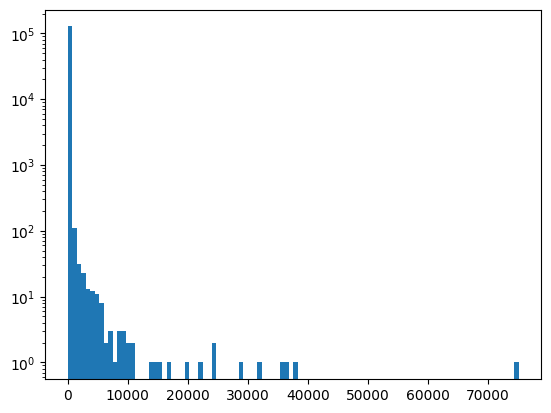

In [118]:
_ = plt.hist(word_counts, bins=100, log=True)

**Aufgabe 4:** Was sind die häufigsten Wörter? In wie viel Prozent der Dokumente kommen diese vor? Sind diese Wörter geeignet, um die verschiedenen Kategorien voneinander zu unterscheiden?

In [119]:
list(sorted(vocab.items(), key=lambda x: x[1], reverse=True))[:10]

[('the', 75078),
 ('to', 37566),
 ('ax>', 36474),
 ('of', 35600),
 ('a', 31858),
 ('and', 29260),
 ('in', 24515),
 ('i', 24466),
 ('is', 22321),
 ('that', 20257)]

In [120]:
stopwords = []

for word, count in vocab.items():
    if count > 1_000:
        print(word)
        stopwords.append(word)

from:
edu
subject:
re:
-
organization:
lines:
is
not
what
a
who
that
an
which
has
at
to
i
ve
--
after
please
com
and
was
s
distribution:
the
two
for
have
been
out
there
now
those
don
t
of
all
in
any
will
work
people
us
some
do
they
can
be
or
such
this
think
we
right
something
on
from
you
one
am
your
no
up
as
would
like
their
but
believe
with
so
see
are
anyone
why
just
his
into
then
by
say
want
going
m
since
d
go
system
only
even
when
them
re
should
c
where
than
these
if
it
know
good
me
my
really
need
too
much
about
other
com>
2
0
first
had
very
could
use
same
university
its
were
being
time
does
more
how
get
well
make
problem
writes:
also
>
over
:
3
world
5
used
1
nntp-posting-host:
article
edu>
he
information
him
said
most
way
because
*
|
ca
computer
|>
	
new
here
many
4
6
did
our
god
>>
may
x
`@
max>
ax>


**Aufgabe 5:** Schreibe eine Funktion, die die häufigsten Wörter ohne Unterscheidungskraft (sog. "stopwords") aus den Dokumenten entfernt.

In [121]:
tokenized_docs = tokenize_documents(x_train[:10])

def remove_stopwords(tokenized_docs):
    cleaned_docs = []
    for doc in tokenized_docs:
        # START Dein Code
        
        cleaned_doc = []
        
        for word in doc:
            if word in stopwords:
                continue
            else:
                cleaned_doc.append(word)
    
        # ENDE
        cleaned_docs.append(cleaned_doc)
    
    return cleaned_docs

remove_stopwords(tokenized_docs)

[['khan0095@nova',
  'gmi',
  'mohammad',
  'razi',
  'khan',
  'fundamentalism',
  'again',
  'gmi',
  'engineering&management',
  'institute',
  'flint',
  'mi',
  '10',
  'ok',
  'someone',
  'fundamentalist',
  'someone',
  'else',
  'defines',
  'fundamentalist',
  'essential',
  'question',
  'nobody',
  'agreed',
  'upon',
  'answer',
  'least',
  'literature',
  '/',
  'discussion',
  '/',
  'news',
  'seen',
  'mohammad',
  'r',
  'khan',
  '/',
  'khan0095@nova',
  'gmi',
  'july',
  '93',
  'send',
  'mail',
  'mkhan@nyx',
  'cs',
  'du'],
 ['richw@mks',
  'rich',
  'wales',
  'sick',
  'tired',
  'bill',
  'conklin',
  'et',
  'al',
  'letter',
  'reply-to:',
  'richw@mks',
  'rich',
  'wales',
  'mortice',
  'kern',
  'systems',
  'inc',
  'waterloo',
  'ontario',
  'canada',
  'na',
  '92',
  'replying',
  'j',
  'teel:',
  '\twell',
  'nifty',
  'letters',
  'giving',
  'concrete',
  'proof',
  '\tincome',
  'tax',
  'voluntary',
  'giving',
  'specific',
  'procedures',

**Aufgabe 6:** Erstelle das Vokabular des gesamten Trainings-Datensatzes ohne Stopwords.

In [122]:
tokenized_docs = tokenize_documents(x_train)
tokenized_docs = remove_stopwords(tokenized_docs)

In [123]:
vocab = create_vocabulary(tokenized_docs)

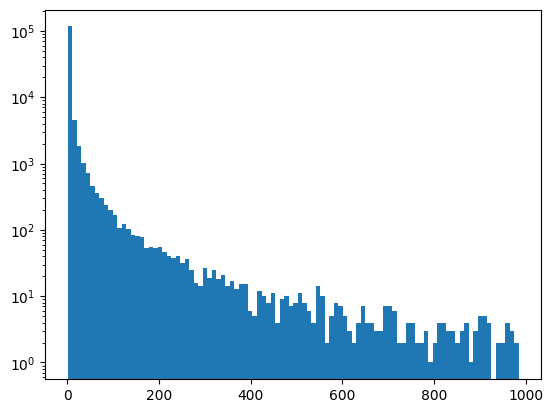

In [124]:
_ = plt.hist(list(vocab.values()), bins=100, log=True)

In [125]:
len(vocab)

127800

**Aufgabe 7:** Erstelle eine Liste `feature_words` der 1.000 häufigsten Wörter.

Erstelle eine Funktion `extract_features(preprocessed_documents, feature_words)` die jedes Dokument eine Liste `bow_doc` der Länge 1000 konvertiert.

Jeder Eintrag der Liste entspricht einem Wort aus `feature_words`. Wenn das Wort in dem Dokument vorkommt, ist der Eintrag `1`, ansonsten `0`.

Zum Beispiel: Wenn `feature_words[5]` das Wort "Hund" ist und "Hund" im Dokument vorkommt, dann ist `bow_doc[5] == 1`.

In [126]:
import numpy as np

In [127]:
words = np.array(list(vocab.keys()))

In [128]:
counts = np.array(list(vocab.values()))

In [129]:
np.argsort(-counts)

array([   148,    304,    440, ...,  74333,  27103, 127799])

In [130]:
counts[387]

4

In [131]:
words[np.argsort(-counts)[:10]]

array(['still', 'll', 'help', 'back', 'u', 'n', '7', 'years', 'off',
       'using'], dtype='<U182')

In [132]:
feature_words = words[np.argsort(-counts)[:1000]]

tokenized_docs = remove_stopwords(tokenize_documents(x_train[:10]))

def extract_features(tokenized_docs, feature_words):
    
    processed_data = []
    
    for doc in tokenized_docs:
        vector = []
        for word in feature_words:
            if word in doc:
                vector.append(1)
            else:
                vector.append(0)
        
        processed_data.append(np.array(vector))
    
    return np.array(processed_data)
    

extract_features(tokenized_docs, feature_words)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [133]:
tokenized_docs = remove_stopwords(tokenize_documents(x_train))
x_train_pp = extract_features(tokenized_docs, feature_words)

In [134]:
x_train_pp.shape

(5657, 1000)

In [135]:
x_train_pp.mean(axis=0)[:10]

array([0.12480113, 0.11207354, 0.11879088, 0.11755347, 0.08750221,
       0.04260209, 0.07017854, 0.11826056, 0.11278063, 0.11437158])

**Aufgabe 8:** Kombiniere die erstellten Funktionen zu einem kompletten Text-Preprocessing:

- Test- und Trainingsdaten mit `tokenize_documents` und `remove_stopwords` vorbereiten.
- Aus den Trainingsdaten das Vokabular ermitteln (aus Aufgabe 6 kopieren).
- Aus dem Vokabular die `feature_words` ermitteln.
- Test- und Trainingsdaten mit `extract_features` in Vektoren umwandeln.

In [136]:
def preprocess_text_data(x_train, x_test):
    # START Dein Code
    
    tokenized_docs = tokenize_documents(x_train)
    tokenized_docs = remove_stopwords(tokenized_docs)
    
    vocab = create_vocabulary(tokenized_docs)
    
    words = np.array(list(vocab.keys()))
    counts = np.array(list(vocab.values()))
    
    feature_words = words[np.argsort(-counts)[:1000]]
    
    x_train_pp = extract_features(tokenized_docs, feature_words)
    
    tokenized_docs = tokenize_documents(x_test)
    tokenized_docs = remove_stopwords(tokenized_docs)
    
    x_test_pp = extract_features(tokenized_docs, feature_words)
    
    # ENDE
    
    return x_train_pp, x_test_pp

In [137]:
x_train_pp, x_test_pp = preprocess_text_data(x_train, x_test)

## CountVectorizer

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
count_vec = CountVectorizer(max_features=1_000)

In [140]:
count_vec.fit(x_train)

CountVectorizer(max_features=1000)

In [141]:
len(count_vec.vocabulary_)

1000

In [142]:
_ = count_vec.transform(x_train[:1]).toarray()

## Klassifikation mit Naive Bayes

**Idee:** 

Für jedes Wort $x_i$ gibt es eine Wahrscheinlichkeit, dass es in einem Text der Kategorie $y$ auftaucht: $P(x_i | y )$

Die Wahrscheinlichkeit, dass ein Text zur Kategorie $y$ gehört, ist dann $P(y | x_1, ..., x_n) = P(x_1 | y) P(x_2 | y) ... = \prod_i^n P(x_i | y)$

In unserem Fall nehmen wir an, dass $P(x_i|y) = \frac{N_{y,i} + \alpha}{N_y + \alpha n}$, wobei $N_{y, i}$ die Anzahl ist, mit der $x_i$ in Texten der Kategorie $y$ auftaucht und $N_y$ die Gesamtzahl aller Worte/Features in der Klasse $y$ (also die Summe aller $N_{y,i}$).



In [143]:
from sklearn.naive_bayes import MultinomialNB

In [144]:
model = MultinomialNB()

In [145]:
model.fit(count_vec.transform(x_train), y_train)

MultinomialNB()

In [146]:
model.score(count_vec.transform(x_test), y_test)

0.6399151493724589

In [147]:
model.score(count_vec.transform(x_train), y_train)

0.7332508396676684

## Term Frequency - Inverse Document Frequency (tf-idf)

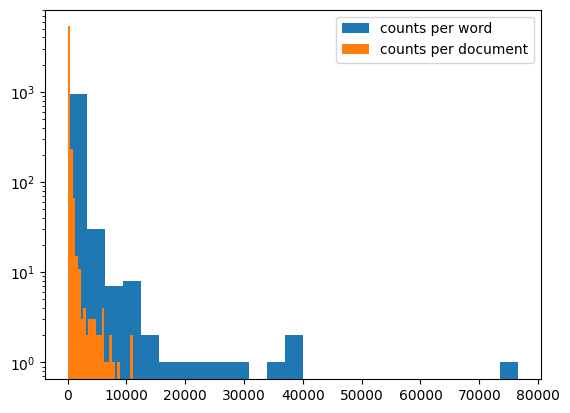

In [148]:
x_train_counts = count_vec.transform(x_train)

counts_per_word = x_train_counts.sum(axis=0)
counts_per_word.shape
import numpy as np

counts_per_word = np.squeeze(np.asarray(counts_per_word))
counts_per_word.shape
plt.hist(counts_per_word, bins=25, log=True, label="counts per word")
counts_per_document = x_train_counts.sum(axis=1)
counts_per_document = np.squeeze(np.asarray(counts_per_document))
plt.hist(counts_per_document, bins=25, log=True, label="counts per document")
_ = plt.legend()

**Term Frequency:** Anzahl der Vorkommen eines Worts gewichtet nach der Länge des Texts.

**Document Frequency:** Worte die in vielen Texten vorkommen werden geringer gewichtet als Worte, die nur in wenigen Texten vorkommen.

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=600, max_df=0.1)
tf_idf.fit(x_train)
x_train_tfidf = tf_idf.transform(x_train)
tf_idf.vocabulary_

{'again': 53,
 'engineering': 202,
 'institute': 292,
 'ok': 387,
 'else': 198,
 'answer': 66,
 'least': 321,
 'discussion': 180,
 'seen': 474,
 '93': 42,
 'send': 476,
 'bill': 97,
 'al': 57,
 'systems': 519,
 'inc': 286,
 'canada': 112,
 'na': 367,
 '92': 41,
 'specific': 502,
 'provide': 436,
 'law': 318,
 'show': 485,
 'working': 588,
 'pay': 403,
 'themselves': 528,
 'issue': 299,
 'important': 285,
 'unless': 555,
 'call': 109,
 'date': 165,
 'given': 243,
 'hear': 266,
 'haven': 263,
 'yet': 597,
 'posted': 423,
 'reason': 446,
 'agree': 56,
 'seem': 472,
 'legal': 323,
 'feel': 222,
 'company': 149,
 'hope': 277,
 'position': 420,
 'states': 509,
 'matter': 346,
 'looking': 334,
 'anyway': 69,
 'thought': 531,
 'told': 538,
 'every': 206,
 'big': 95,
 'face': 215,
 'enough': 203,
 'care': 116,
 'didn': 177,
 'tell': 525,
 'comes': 146,
 'away': 85,
 'washington': 572,
 'maybe': 348,
 'common': 147,
 'society': 495,
 'fine': 225,
 'car': 114,
 'driver': 189,
 'game': 239,
 'sorr

In [150]:
model2 = MultinomialNB()
model2.fit(x_train_tfidf, y_train)
model2.score(x_train_tfidf, y_train)
model2.score(tf_idf.transform(x_test), y_test)

0.6738554003888987

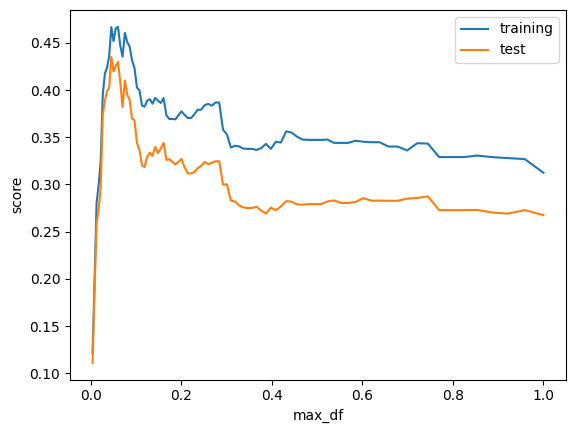

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils._param_validation import InvalidParameterError

tr = []
ts = []
ps = []
par = "max_df"
for i in range(1, 100):
    p = 1 - np.log10(i/10)

    tf_idf = TfidfVectorizer(max_features=100, **{par: p})
    
    try:
        _x = tf_idf.fit_transform(x_train)
    except InvalidParameterError:
        continue
    _xt = tf_idf.transform(x_test)
    
    _m = MultinomialNB()
    _m.fit(_x, y_train)
    ps.append(p)
    tr.append(_m.score(_x, y_train))
    ts.append(_m.score(_xt, y_test))
    
plt.plot(ps, tr, label="training")
plt.plot(ps, ts, label="test")
plt.xlabel(par)
plt.ylabel("score")
plt.legend()